In [ ]:
# default_exp trainers
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FRED
from FRED.trainers import *
from FRED.trainers import Trainer
if torch.__version__[:4] == '1.13': # If using pytorch with MPS, use Apple silicon GPU acceleration
    device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.has_mps else "cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
%load_ext autoreload
%autoreload 2

Using device cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 04c01 Trainer: Flow Neighbor Loss and Diffusion Map Regularization
> A copy of FRED, tailored with particular loss functions

In [ ]:
# initialize model parameters and layers
from FRED.embed import ManifoldFlowEmbedder
from FRED.trainers import save_embedding_visualization, visualize_points
title = "Flow Neighbor Loss + Diffusion Map Reg"
MFE = ManifoldFlowEmbedder(
            embedding_dimension=2,
            embedder_shape=[3, 4, 8, 4, 2],
            device=device,
            sigma=0.5,
            flow_strength=0.5,
            smoothness_grid=True,
        )
loss_weights = {
            "reconstruction": 1,
            "diffusion map regularization": 1,
            "flow neighbor loss": 1e-3,
            "smoothness": 0,
        }
visualization_functions = [
    save_embedding_visualization,
    visualize_points
]
FREDtrainer = Trainer(FE = MFE, loss_weights=loss_weights, visualization_functions = visualization_functions, device=device, title = title)

# Testing on the Circle

Set sigma =  0.015220042


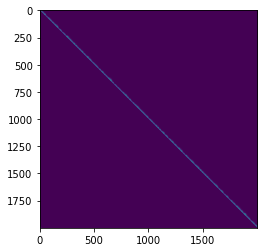

In [ ]:
from FRED.datasets import directed_circle
from FRED.data_processing import dataloader_from_ndarray
X, flow, labels = directed_circle(num_nodes=2000)
# build dataset
dataloader = dataloader_from_ndarray(X,flow,labels)

  0%|          | 0/10 [00:00<?, ?it/s]

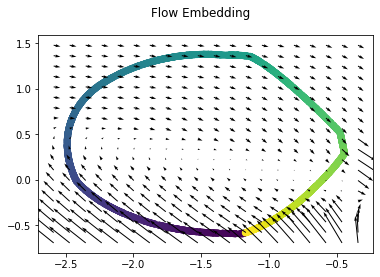

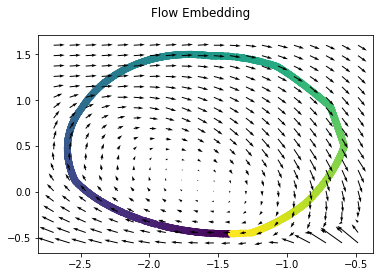

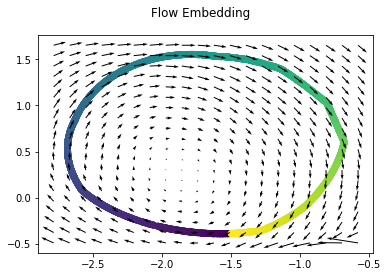

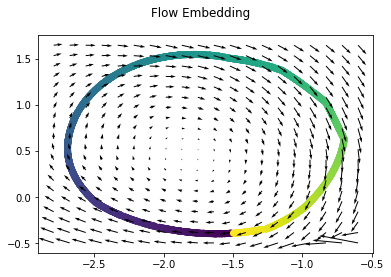

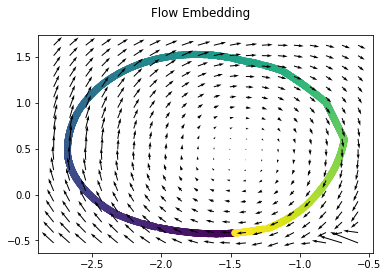

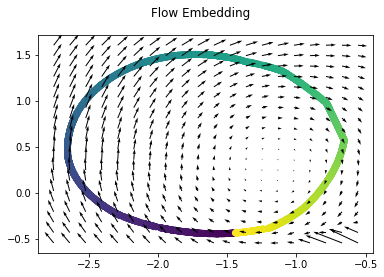

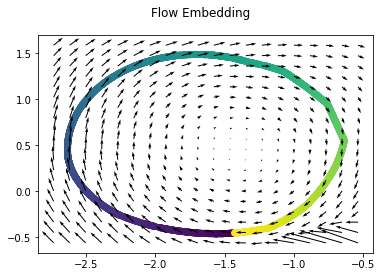

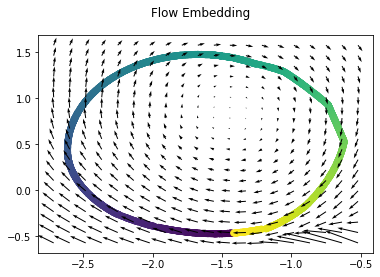

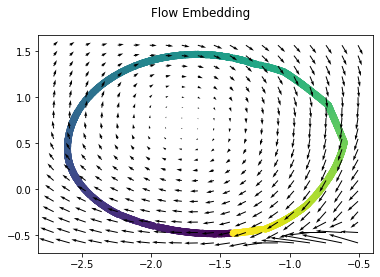

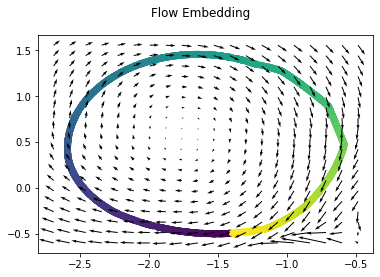

In [ ]:
FREDtrainer.fit(dataloader, n_epochs = 10)

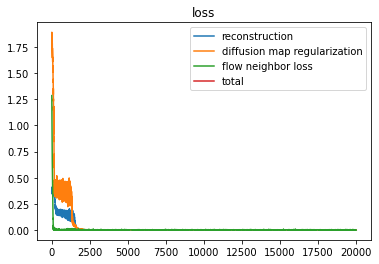

In [ ]:
FREDtrainer.visualize_loss()

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


  0%|          | 0/10 [00:00<?, ?it/s]

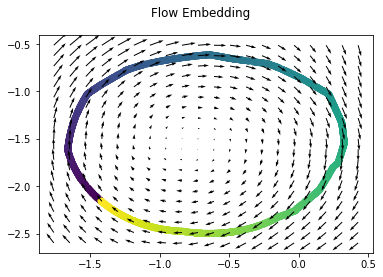

 
*** Profile stats marshalled to file 'fredstats.prof'.


In [ ]:
%load_ext snakeviz
%prun -D fredstats.prof FREDtrainer.fit(dataloader, n_epochs = 10)

# Testing on the Swiss Roll

In [ ]:
# initialize model parameters and layers
from FRED.embed import ManifoldFlowEmbedder
from FRED.trainers import save_embedding_visualization, visualize_points
title = "Flow Neighbor Loss + Diffusion Map Reg"
MFE = ManifoldFlowEmbedder(
            embedding_dimension=2,
            embedder_shape=[3, 4, 8, 4, 2],
            device=device,
            sigma=0.5,
            flow_strength=0.5,
            smoothness_grid=True,
        )
loss_weights = {
            "reconstruction": 1e-3,
            "diffusion map regularization": 1,
            "flow neighbor loss": 1e-4,
            "smoothness": 0,
        }
visualization_functions = [
    save_embedding_visualization,
    visualize_points
]
FREDtrainer = Trainer(FE = MFE, loss_weights=loss_weights, visualization_functions = visualization_functions, device=device, title = title)

Set sigma =  1.144358


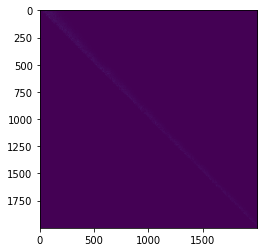

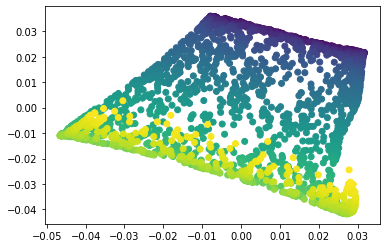

In [ ]:
from FRED.datasets import directed_swiss_roll_delayed
from FRED.data_processing import dataloader_from_ndarray
X, flow, labels = directed_swiss_roll_delayed(num_nodes=2000)
# build dataset
dataloader = dataloader_from_ndarray(X,flow,labels, sigma = "automatic", k = 5)

  0%|          | 0/10 [00:00<?, ?it/s]

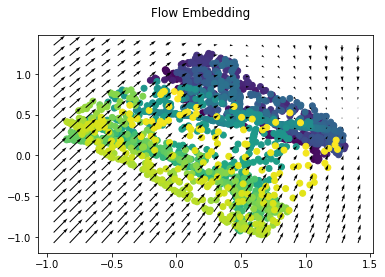

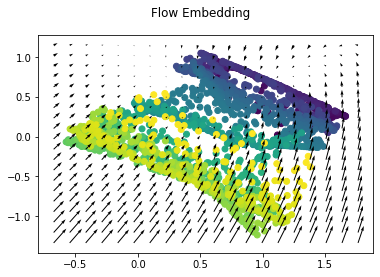

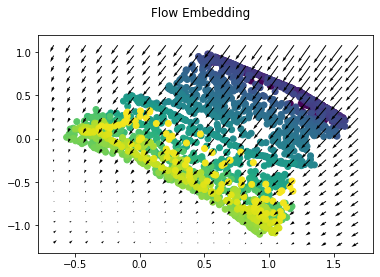

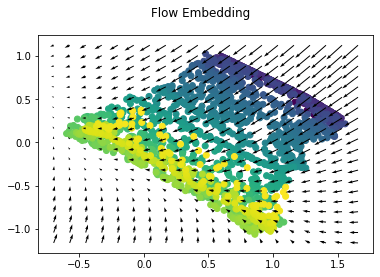

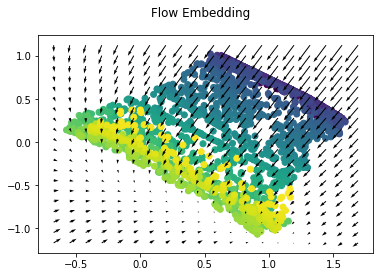

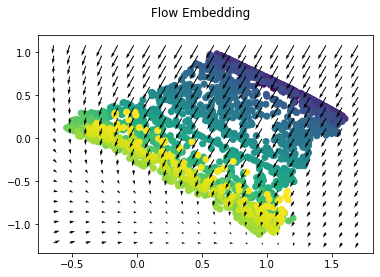

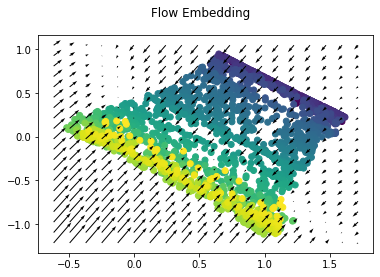

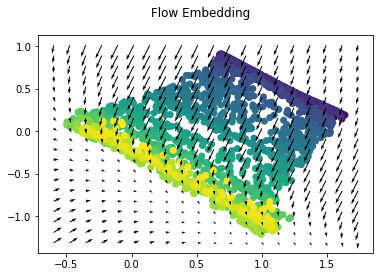

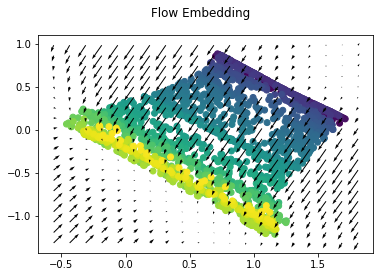

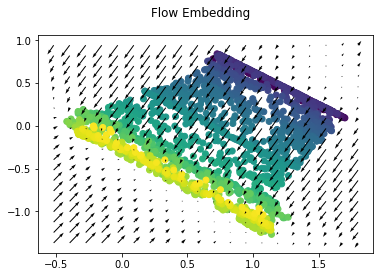

In [ ]:
FREDtrainer.fit(dataloader, n_epochs = 10)

In [ ]:
FREDtrainer.visualize_loss()

AttributeError: 'NoneType' object has no attribute 'keys'

# Branch

In [ ]:
# initialize model parameters and layers
from FRED.embed import ManifoldFlowEmbedder
from FRED.trainers import save_embedding_visualization, visualize_points
title = "Flow Neighbor Loss + Diffusion Map Reg"
MFE = ManifoldFlowEmbedder(
            embedding_dimension=2,
            embedder_shape=[3, 4, 8, 4, 2],
            device=device,
            sigma=0.5,
            flow_strength=0.5,
            smoothness_grid=True,
        )
loss_weights = {
            "reconstruction": 1e-3,
            "diffusion map regularization": 1,
            "flow neighbor loss": 1e-2,
            "smoothness": 0,
        }
visualization_functions = [
    save_embedding_visualization,
    visualize_points
]
FREDtrainer = Trainer(FE = MFE, loss_weights=loss_weights, visualization_functions = visualization_functions, device=device, title = title)

Set sigma =  0.023108136


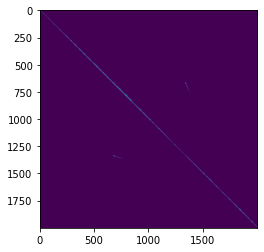

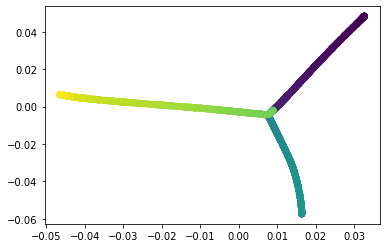

In [ ]:
from FRED.datasets import directed_sinh_branch
from FRED.data_processing import dataloader_from_ndarray
X, flow, labels = directed_sinh_branch(num_nodes=2000)
# build dataset
dataloader = dataloader_from_ndarray(X,flow,labels, sigma = "automatic", k = 5)

  0%|          | 0/20 [00:00<?, ?it/s]

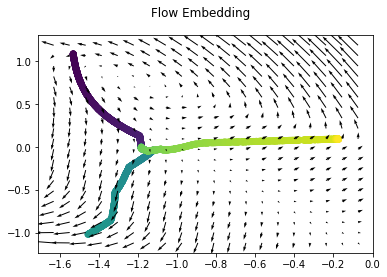

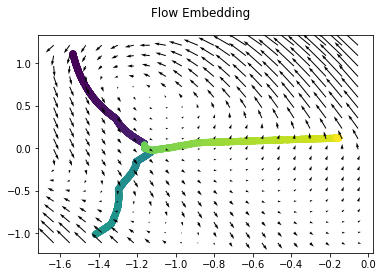

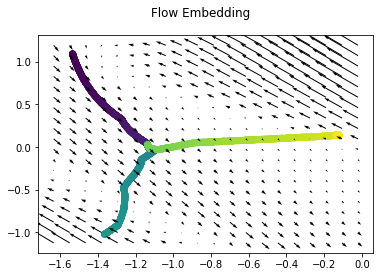

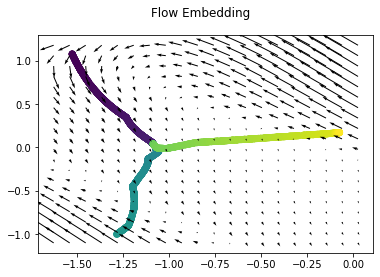

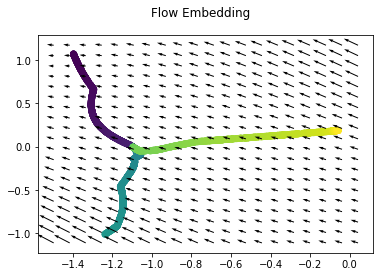

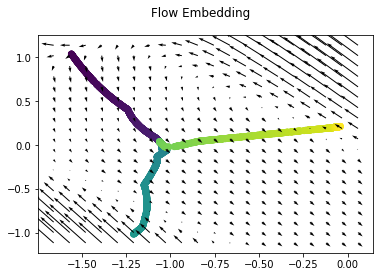

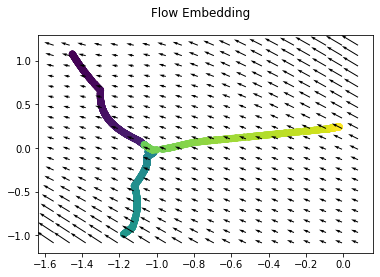

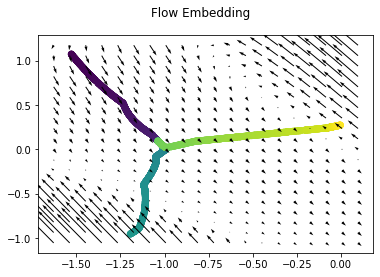

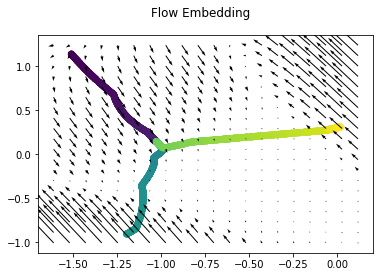

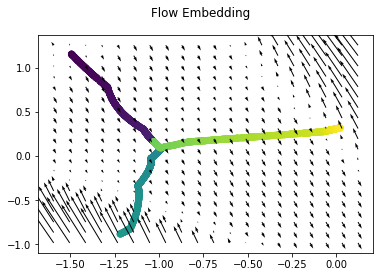

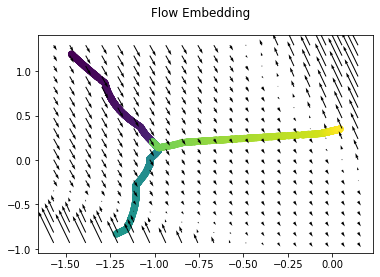

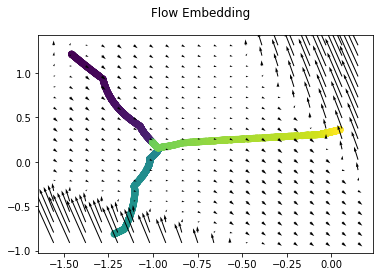

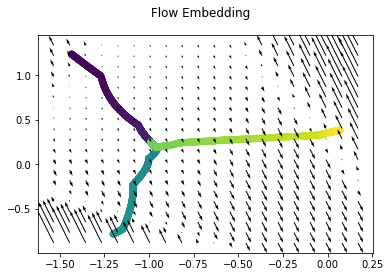

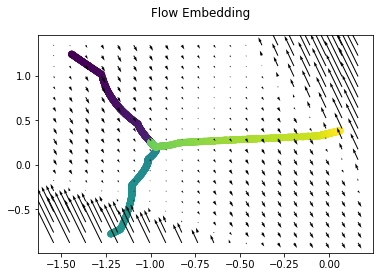

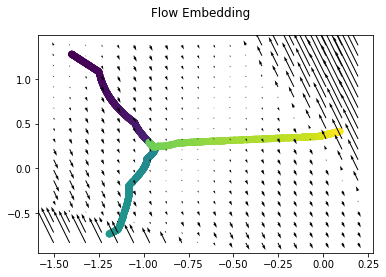

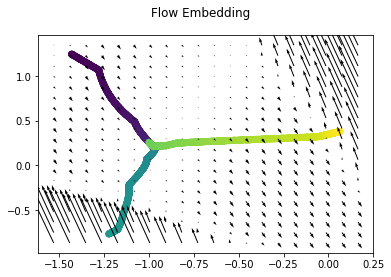

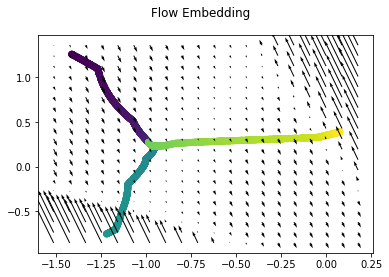

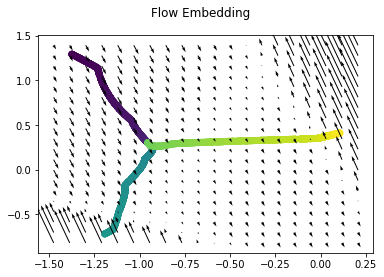

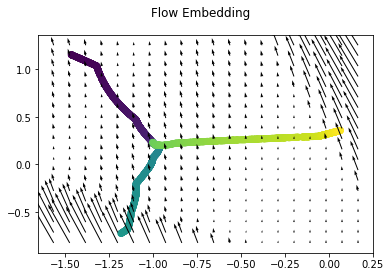

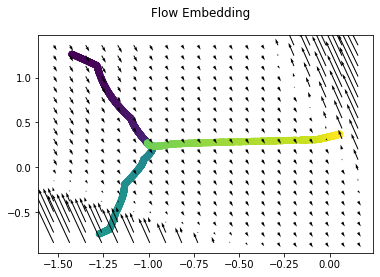

In [ ]:
# High learning rate
# FREDtrainer.fit(dataloader,n_epochs=20)

In [ ]:
FREDtrainer.training_gif(duration=500)

HTML(value='<img src="data:image/gif;base64,R0lGODlhsAEgAYcAAP///////f//+///+v//+P//9v//8P//z/7///7//f3//vz///…

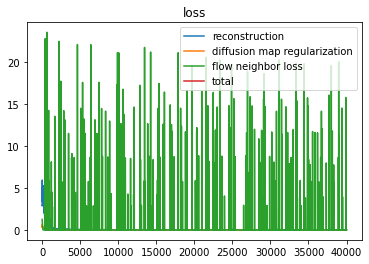

In [ ]:
FREDtrainer.visualize_loss()